# Assignment 2 vj222hx

In [715]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sympy as sp

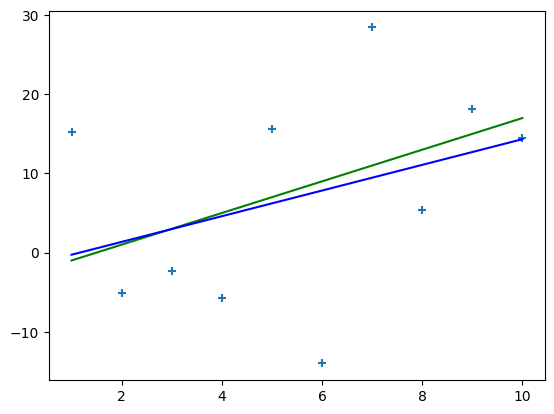

In [716]:
np.random.seed(1)

N = 10
a0 = 2
b0 = -3

X = np.arange(1, N + 1)
noise = np.random.normal(0, 10, N)
Y = a0 * X + b0 + noise
plt.scatter(X, Y, marker='+')
plt.plot(X, a0 * X + b0, color='g')
X_with_const = sm.add_constant(X)
model = sm.OLS(Y, X_with_const).fit()
Y_pred = model.predict(X_with_const)

plt.plot(X, Y_pred, color='b')
plt.show()

Here we are making a line with Y = 2X - 3 in green. Then we are adding some noise to the data, a random offset in the y axis and fitting a linear regression model to it in blue. A seed is used for reproducibility. 

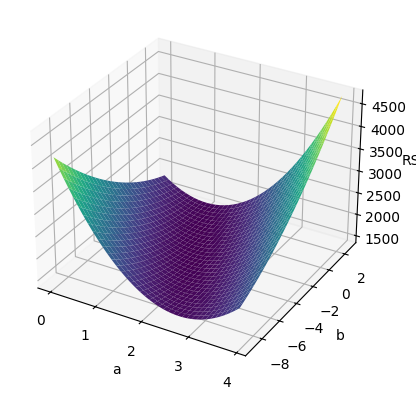

In [717]:
def rss2(a, b, X, Y):
    return np.sum((Y - a*X - b)**2)

def f(a, b):
    return rss2(a, b, X, Y)

a_vals = np.arange(a0 - 2, a0 + 2, 0.1)
b_vals = np.arange(b0 - 6, b0 + 6, 0.4)
A, B = np.meshgrid(a_vals, b_vals)
Z = np.vectorize(f)(A, B)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('RSS')
plt.show()

Here is what the residual sum of squares would be for different combinations of a and b. The goal is mimimize the RSS so we would do gradient decent on this to achive that. 

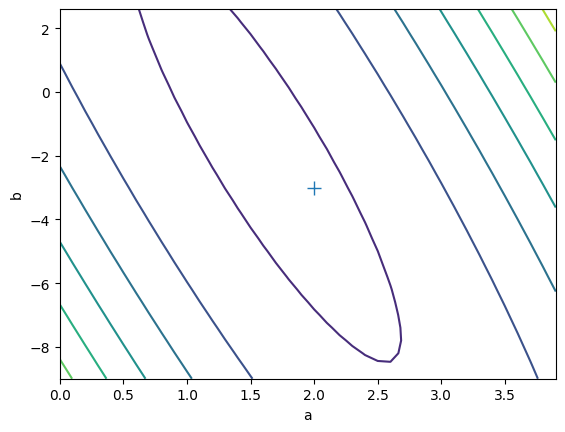

In [718]:
plt.contour(A, B, Z, cmap='viridis')
plt.plot(a0, b0, '+', markersize=10)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Here we are making a level curve of the same plot and marking the dot we are trying to predict. We can see that the prediction will not be fully accurate since the center of the levels are not at the dot.

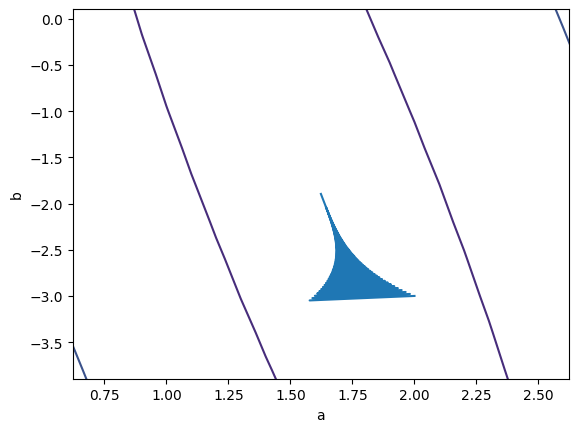

In [719]:
def grad_rss2(a, b, X, Y):
    Y_pred = a * X + b
    error = Y - Y_pred
    grad_a = -2 * np.sum(X * error)
    grad_b = -2 * np.sum(error)
    return np.array([grad_a, grad_b])

def grad_desc_rss2(K, a0, b0, learning_rate, f, grad_f, verbose=False):
    a, b = a0, b0
    a_hist = [a0]
    b_hist = [b0]

    for k in range(K):
        grad = grad_f(a, b)
        a -= learning_rate * grad[0]
        b -= learning_rate * grad[1]
        a_hist.append(a)
        b_hist.append(b)

    return np.array(a_hist), np.array(b_hist)

def ff(a, b):
    return grad_rss2(a, b, X, Y)

K = 1000
learning_eps = 0.0025
as_hist, bs_hist = grad_desc_rss2(K, a0, b0, learning_eps, f, ff, verbose=True)
a_orig = as_hist[-1]
b_orig = bs_hist[-1]

plt.contour(A, B, Z, cmap='viridis')
plt.plot(as_hist, bs_hist)
plt.xlim(a_orig - 1, a_orig + 1)
plt.ylim(b_orig - 2, b_orig + 2)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Here we are doing gradiant decent starting at (2, -3). We are doing this in "K" iterations where each iteration we look att which way it is decending the most and then take a step of "learning_eps" in that direction. 

Orig: a = 1.62, b = -1.90, loss = 1406.49


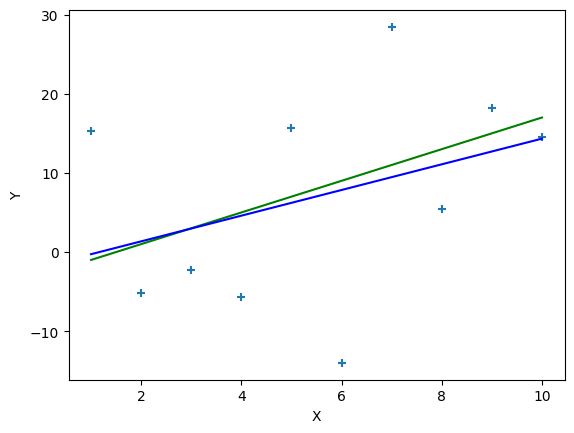

In [720]:
final_loss = f(a_orig, b_orig)

print(f"Orig: a = {a_orig:.2f}, b = {b_orig:.2f}, loss = {final_loss:.2f}")

plt.scatter(X, Y, marker='+', label='Data')
plt.plot(X, a0 * X + b0, color='g')
plt.plot(X, a_orig * X + b_orig, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Here is the plot of the actual value in green and the predicted value in blue with the final loss printed above the plot.

## Regularization with the $L^2$ Norm

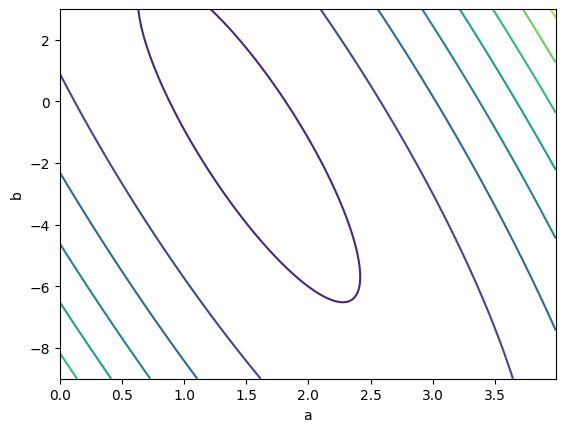

In [721]:
alpha = 1

def fL2(a, b):
    return f(a, b) + alpha * (a**2 + b**2)

a_vals = np.arange(a0 - 2, a0 + 2, 0.01)
b_vals = np.arange(b0 - 6, b0 + 6, 0.01)
A, B = np.meshgrid(a_vals, b_vals)

Z = np.vectorize(fL2)(A, B)

plt.contour(A, B, Z, cmap='viridis')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Here we are adding a penalty L2 of $\alpha(a^2+b^2)$

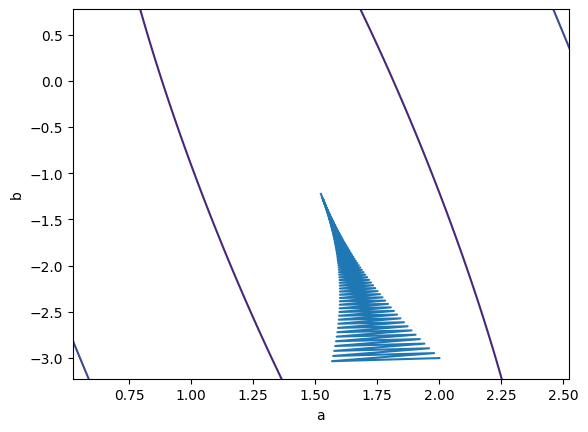

In [722]:
def ffL2(a, b):
    return ff(a, b) + np.array([2 * alpha * a, 2 * alpha * b])

K = 1000
learning_eps = 0.0025
as_hist, bs_hist = grad_desc_rss2(K, a0, b0, learning_eps, fL2, ffL2, verbose=True)
a_orig = as_hist[-1]
b_orig = bs_hist[-1]

plt.contour(A, B, Z, cmap='viridis')
plt.plot(as_hist, bs_hist)
plt.xlim(a_orig - 1, a_orig + 1)
plt.ylim(b_orig - 2, b_orig + 2)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Now we performed gradient decent again but with the new penalty function

Orig: a = 1.52, b = -1.22, loss = 1411.28


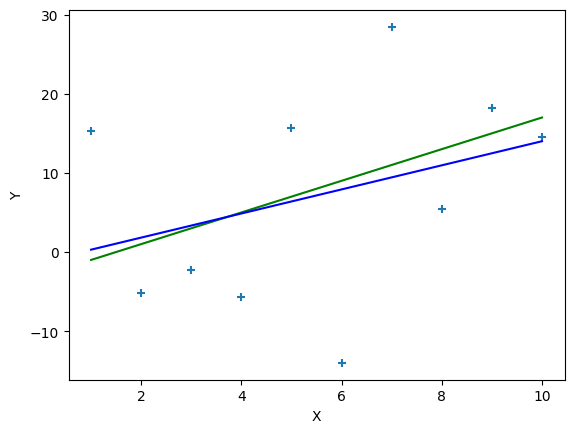

In [723]:
final_loss = fL2(a_orig, b_orig)

print(f"Orig: a = {a_orig:.2f}, b = {b_orig:.2f}, loss = {final_loss:.2f}")

plt.scatter(X, Y, marker='+', label='Data')
plt.plot(X, a0 * X + b0, color='g')
plt.plot(X, a_orig * X + b_orig, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here we can see the predicted point above the graph with the acutal line in green and the predicted line in blue with the final loss printed above the graph. 

## Parameter Tying with the $L^2$ Norm

For parameter Tying we are using the same code as with regularization but with a different loss function and gradient loss

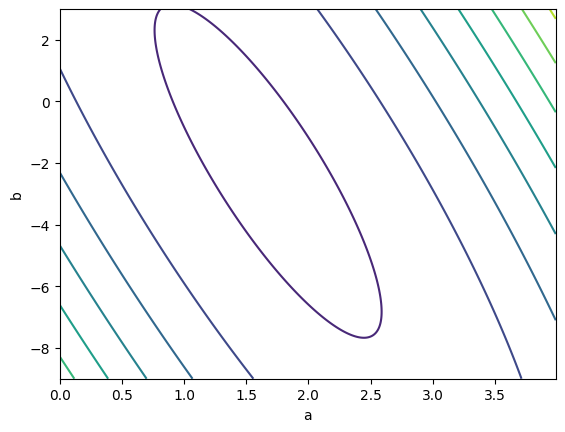

In [724]:
alpha = 1

def fL2(a, b):
    return f(a, b) + alpha * ((a-a0)**2 + (b-b0)**2)

a_vals = np.arange(a0 - 2, a0 + 2, 0.01)
b_vals = np.arange(b0 - 6, b0 + 6, 0.01)
A, B = np.meshgrid(a_vals, b_vals)

Z = np.vectorize(fL2)(A, B)

plt.contour(A, B, Z, cmap='viridis')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

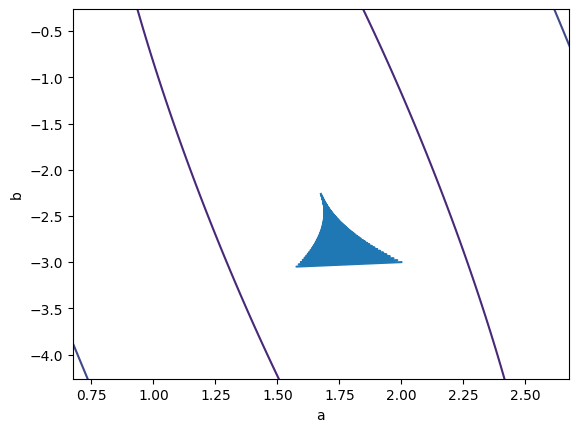

In [725]:
def ffL2(a, b):
    return ff(a, b) + np.array([2 * alpha * (a-a0), 2 * alpha * (b-b0)])

K = 1000
learning_eps = 0.0025
as_hist, bs_hist = grad_desc_rss2(K, a0, b0, learning_eps, fL2, ffL2, verbose=True)
a_orig = as_hist[-1]
b_orig = bs_hist[-1]

plt.contour(A, B, Z, cmap='viridis')
plt.plot(as_hist, bs_hist)
plt.xlim(a_orig - 1, a_orig + 1)
plt.ylim(b_orig - 2, b_orig + 2)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Orig: a = 1.68, b = -2.26, loss = 1407.43


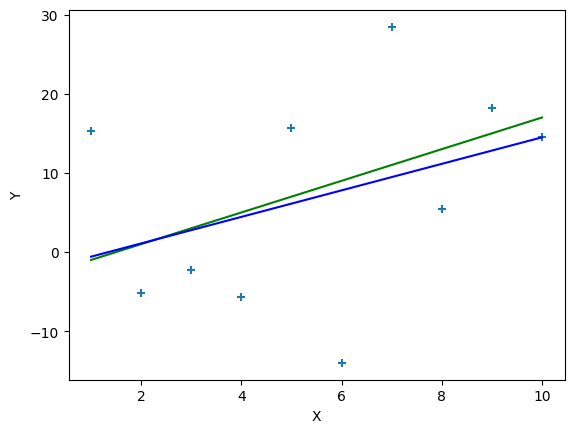

In [726]:
final_loss = fL2(a_orig, b_orig)

print(f"Orig: a = {a_orig:.2f}, b = {b_orig:.2f}, loss = {final_loss:.2f}")

plt.scatter(X, Y, marker='+', label='Data')
plt.plot(X, a0 * X + b0, color='g')
plt.plot(X, a_orig * X + b_orig, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

As expected this is slightly better than without parameter tying

### 4.2 Regularization with the $L^2$ Norm inequality constraint

In [727]:
def grad_rss3(a, b, alpha, s, c, X, Y):
    error = Y - (a * X + b)

    grad_a = -2 * np.sum(error * X) + 2 * alpha * a
    grad_b = -2 * np.sum(error) + 2 * alpha * b

    grad_alpha = a**2 + b**2 - c + s**2
    grad_s = 2 * alpha * s
    return np.array([grad_a, grad_b, grad_alpha, grad_s])

Here we make a new gradient loss function with a constraint. We also add a slack variabel to the constraint to ensure it is positive. The slack variable is squared to also ensure it is always positive. 

In [728]:
def grad_desc_rss3(K, a0, b0, alpha0, s0, learning_eps, f_orig, f, ff, verbose=False):
    as_hist = np.zeros(K + 1)
    bs_hist = np.zeros(K + 1)
    alphas_hist = np.zeros(K + 1)
    ss_hist = np.zeros(K + 1)

    as_hist[0] = a0
    bs_hist[0] = b0
    alphas_hist[0] = alpha0
    ss_hist[0] = s0

    for k in range(K):
        grad_w = ff(as_hist[k], bs_hist[k], alphas_hist[k], ss_hist[k])
        grad_a, grad_b, grad_alpha, grad_s = grad_w

        as_hist[k + 1] = as_hist[k] - learning_eps * grad_a
        bs_hist[k + 1] = bs_hist[k] - learning_eps * grad_b
        alphas_hist[k + 1] = alphas_hist[k] - learning_eps * grad_alpha
        ss_hist[k + 1] = ss_hist[k] - learning_eps * grad_s


    if verbose:
        alow = min(np.min(as_hist), a0 - 2)
        ahigh = max(np.max(as_hist), a0 + 2)
        blow = min(np.min(bs_hist), b0 - 3)
        bhigh = max(np.max(bs_hist), b0 + 3)

        A, B = np.meshgrid(np.arange(alow, ahigh, 0.1), np.arange(blow, bhigh, 0.4))
        Z = np.vectorize(f_orig)(A, B)

        plt.plot([as_hist[k], as_hist[k+1]], [bs_hist[k], bs_hist[k+1]], 'r-', alpha=0.3)
        plt.contour(A, B, Z, cmap='viridis')
        plt.plot(as_hist, bs_hist, 'r')
        plt.xlabel('a')
        plt.ylabel('b')
        plt.show()

    return as_hist, bs_hist, alphas_hist, ss_hist

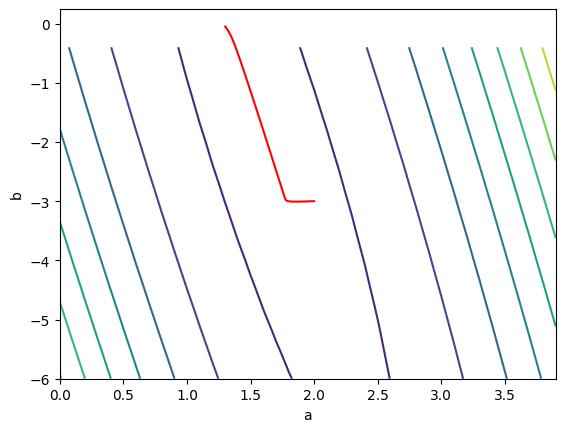

In [729]:
K = 1500
learning_eps = 0.0005
alpha0 = 1
c = 25

def fL2c(a, b, alpha, s):
    return f(a, b) + alpha * (a**2 + b**2 - c + s**2)

def ffL2c(a, b, alpha, s):
    return grad_rss3(a, b, alpha, s, c, X, Y)

s0 = 1
as_hist, bs_hist, alphas_hist, ss_hist = grad_desc_rss3(K, a0, b0, alpha0, s0, learning_eps, f, fL2c, ffL2c, verbose=True)

Here we are doing gradient dencent with the previously made gradient loss function (grad_rss3) where we cant go outside a circle of $\sqrt{c}$

L2 Constraint: a=1.30 b=-0.05 alpha=17.19 s=0.00 loss=1424.24
a^2 + b^2 = 1.70 < c=25


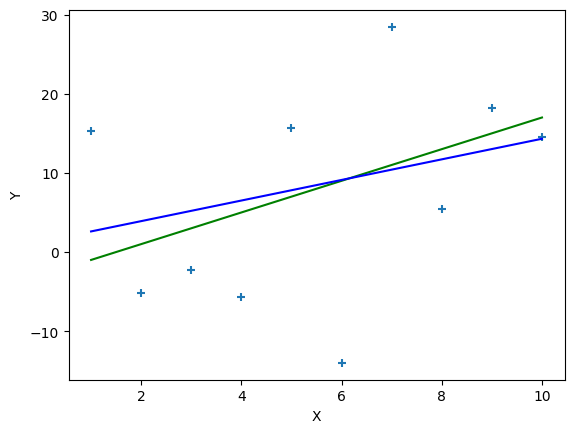

In [730]:
final_loss = fL2(as_hist[-1], bs_hist[-1])
print(f"L2 Constraint: a={as_hist[-1]:.2f} b={bs_hist[-1]:.2f} alpha={alphas_hist[-1]:.2f} s={ss_hist[-1]:.2f} loss={final_loss:.2f}")
print(f"a^2 + b^2 = {as_hist[-1]**2 + bs_hist[-1]**2:.2f} < c={c}")

plt.scatter(X, Y, marker='+', label='Data')
plt.plot(X, a0 * X + b0, color='g')
plt.plot(X, as_hist[-1] * X + as_hist[-1], color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here we found the a new point in blue with the ground truth in green and all the final values above the plot. Since alpha > 0 and a^2 + b^2 - c < 0 we are violating the KKT condition meaning that we are not at a local minimum.

Case 3a

In [731]:
c = 25

print(f"a_orig = {a_orig:.4f}")
print(f"b_orig = {b_orig:.4f}")
print(a_orig**2 + b_orig**2 - c)

a_orig = 1.6758
b_orig = -2.2619
-17.0755645160352


In the case of the random seed set in this notebook we get an answer of -17 < 0 which means that the unconstrained problem is feasible and thus giving us a local optimum

In [732]:
ettor = np.ones(len(X))

a, b, alpha = sp.symbols('a b alpha', real=True)

eqn1 = -2 * np.dot((Y - a*X - b), X) + 2 * alpha * a 
eqn2 = -2 * np.dot((Y - a*X - b), ettor) + 2 * alpha * b 
c = (2 + 1)**2 + (3 + 1)**2 
eqn3 = a**2 + b**2 - c 

sol = sp.nsolve([eqn1, eqn2, eqn3], (a, b, alpha), (2, 1-3, 1))
a_hat, b_hat, alpha_hat = sol

print(f"a_hat = {a_hat.evalf():.4f}")
print(f"b_hat = {b_hat.evalf():.4f}")
print(f"alpha_hat = {alpha_hat.evalf():.4f}")

a_hat = 2.0119
b_hat = -4.5774
alpha_hat = -1.1812


Here we are only getting one solution

L2 constraint: a=2.01 b=-4.58 alpha=-1.18 loss=1421.91
 feasible: a^2 + b^2 = 25.00 == c=25.00


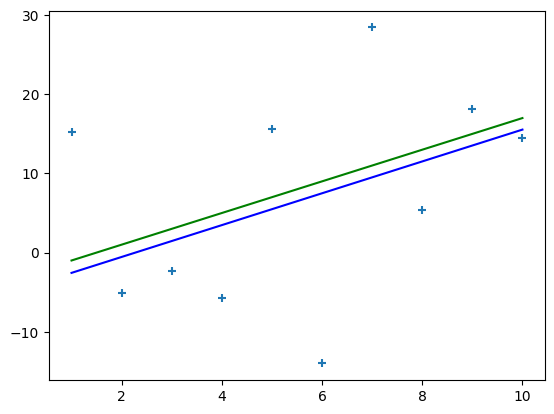

In [733]:
rss = rss2(a_hat, b_hat, X, Y)

print(f"L2 constraint: a={a_hat:.2f} b={b_hat:.2f} alpha={alpha_hat:.2f} loss={rss:.2f}")
print(f" feasible: a^2 + b^2 = {a_hat**2 + b_hat**2:.2f} == c={c:.2f}")

plt.scatter(X, Y, marker='+', label='Data')
plt.plot(X, a0 * X + b0, color='g', label='Original line')
plt.plot(X, a_hat * X + b_hat, color='b')
plt.show()

Here we have a feasible solution on the contraint line.